# Plug flow reactor simulation of Thruster

![caption](Graphics/thruster-details.png)


In [3]:
import cantera as ct
import numpy as np

from matplotlib import pyplot as plt
import csv
import os
import itertools
import pandas as pd

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [51]:
import json
with open('rocketman/settings.json') as fp:
    settings = json.load(fp)
cat_area_per_vol_options = list(sorted(set(np.array(settings)[:,0])))
temperature_c_options = list(sorted(set(np.array(settings)[:,1])))

In [53]:
cat_area_per_vol_options, temperature_c_options

([300.0,
  3000.0,
  30000.0,
  300000.0,
  600000.0,
  900000.0,
  1200000.0,
  3000000.0,
  30000000.0,
  300000000.0],
 [200.0, 300.0, 400.0, 500.0, 600.0])

In [54]:

print("Processing SLURM array job.")

rocket_array_dir = 'rocketman'

cti_file = os.path.join(rocket_array_dir,'0','chem_annotated.cti')

print(f"Using cantera input file {os.path.abspath(cti_file)}")

print(f"Settings aray is from 0 to {len(settings)-1} ")

from collections import defaultdict
setting_dict = defaultdict(dict)
for i,(a,t) in enumerate(settings):
    setting_dict[a][t] = i


Processing SLURM array job.
Using cantera input file /Users/rwest/Dropbox (CoMoChEng)/Northeastern/Research-MHI/HAN (github)/CanteraModels/rocketman/0/chem_annotated.cti
Settings aray is from 0 to 49 


In [28]:
data_dict = defaultdict(dict)
for i,(a,t) in enumerate(settings):
    output_filename = os.path.join('rocketman',str(i),'surf_pfr_output.csv')
    print(output_filename, end=' ')
    try:
        data = pd.read_csv(output_filename)
        print("OK ✅")
    except:
        print("FAIL! ❌")
        data = None
    data_dict[a][t] = data

rocketman/0/surf_pfr_output.csv OK ✅
rocketman/1/surf_pfr_output.csv OK ✅
rocketman/2/surf_pfr_output.csv FAIL! ❌
rocketman/3/surf_pfr_output.csv OK ✅
rocketman/4/surf_pfr_output.csv OK ✅
rocketman/5/surf_pfr_output.csv OK ✅
rocketman/6/surf_pfr_output.csv FAIL! ❌
rocketman/7/surf_pfr_output.csv OK ✅
rocketman/8/surf_pfr_output.csv OK ✅
rocketman/9/surf_pfr_output.csv OK ✅
rocketman/10/surf_pfr_output.csv OK ✅
rocketman/11/surf_pfr_output.csv OK ✅
rocketman/12/surf_pfr_output.csv OK ✅
rocketman/13/surf_pfr_output.csv OK ✅
rocketman/14/surf_pfr_output.csv OK ✅
rocketman/15/surf_pfr_output.csv OK ✅
rocketman/16/surf_pfr_output.csv FAIL! ❌
rocketman/17/surf_pfr_output.csv OK ✅
rocketman/18/surf_pfr_output.csv OK ✅
rocketman/19/surf_pfr_output.csv OK ✅
rocketman/20/surf_pfr_output.csv OK ✅
rocketman/21/surf_pfr_output.csv OK ✅
rocketman/22/surf_pfr_output.csv OK ✅
rocketman/23/surf_pfr_output.csv OK ✅
rocketman/24/surf_pfr_output.csv OK ✅
rocketman/25/surf_pfr_output.csv OK ✅
rocketman/26/

In [33]:
NReactors = 2001
def xlabels():
    plt.xticks([0,NReactors/4,NReactors/2,3*NReactors/4, NReactors],['0','','','',f'{length*1000:.0f} mm'])
    plt.xlabel("Distance down reactor")

In [40]:
def f(cat_area_per_vol, temperature_c):
    
    print(f"Catalyst area per volume {cat_area_per_vol :.2e} m2/m3")
    print(f"Initial temperature {temperature_c :.1f} ºC")

    data = data_dict[cat_area_per_vol][temperature_c]
    
    data['T (C)'].plot()
    plt.ylabel('T (C)')
    xlabels()
    plt.show()
    
    data[['gas_heat','surface_heat']].plot()
    xlabels()
    #plt.savefig('gas_and_surface_heat.pdf')
    plt.show()

    species_to_plot = ['NH3(2)',
 'NH2OH(3)',
 'HNO3(4)',
 'CH3OH(5)',
 'H2O(6)',
 'N2(7)',
 'O2(8)',
 'NO2(9)',
 'NO(10)',
 'N2O(11)',
        ]
    data[species_to_plot].plot(title='gas mole fraction', logy=False)
    xlabels()
    plt.tight_layout()
    #plt.savefig(f'gas_mole_fractions_{i}.pdf')
    plt.show()
    

a = widgets.SelectionSlider(
    options=cat_area_per_vol_options,
    value=3e5,
    description='Catalyst area per volume (m2/m3)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
t = widgets.SelectionSlider(
    options=temperature_c_options,
    value=400,
    description='Initial temperature (C)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

interact(f, cat_area_per_vol=a, temperature_c=t)


interactive(children=(SelectionSlider(continuous_update=False, description='Catalyst area per volume (m2/m3)',…

<function __main__.f(cat_area_per_vol, temperature_c)>

In [4]:
gas=ct.Solution(cti_file)
surf = ct.Interface(cti_file,'surface1', [gas])

Catalyst area per volume 3.00e+02 m2/m3
Initial temperature 500.0 ºC


In [7]:
print(", ".join(gas.species_names))

Ne, NH3(2), NH2OH(3), HNO3(4), CH3OH(5), H2O(6), N2(7), O2(8), NO2(9), NO(10), N2O(11), CO2(12), H2(13), CO(14), CH4(15), C2H6(16), CH2O(17), CH3(18), C3H8(19), H(20), C2H5(21), HCO(22), CH3CHO(23), OH(24), C2H4(25), O(36), Ar(37), He(38), HO2(39), H2O2(40), HOCO(41), CH2(42), CH2(S)(43), CH(44), CH2OH(45), CH3O(46), HCOH(47), CH3OO(48), CH2CO(49), C2H3(50), C(51), C2H2(52), C2H(53), CH3OOH(54), CH2OOH(55), HOCH2O(56), HOCHO(57), C2H5O(58), C2H5O2(59), C2H5O2(60), cC2H4O(61), CH2CHO(62), H2CC(63), CH3CO(64), C2H4O(65), C2H5O(66), C2H3O2(67), CHCHO(68), OCHCHO(69), NH2(85), H2NO(88), HNOH(93), NO3(95), H2NO3(239)


In [8]:
print(", ".join(surf.species_names))

X(1), HX(26), OX(27), CH3X(28), HOX(29), H2OX(30), CO2X(31), OCX(32), CX(33), CH2X(34), CHX(35), H2NX(201), H3NX(202), H2NOX(203), H2NOX(204), H3NOX(205), NO2X(206), NO3X(207), HNO3X(208), CH3OX(209), CH3OX(210), CH4OX(211)


In [18]:
# unit conversion factors to SI
cm = 0.01 # m
minute = 60.0  # s

In [19]:
#######################################################################
# Input Parameters for combustor
#######################################################################
mass_flow_rate =  0.5e-3 # kg/s
#temperature_c = 550.0  # Initial Temperature in Celsius
print(f"Initial temperature {temperature_c :.1f} ºC")
pressure = ct.one_atm # constant

length = 1.1 * cm  # Catalyst bed length. 11mm
cross_section_area = np.pi * (0.9*cm)**2  # Catalyst bed area.  18mm diameter circle.


Initial temperature 400.0 ºC


In [18]:
def report_rates(n=8):
    print("\nHighest net rates of progress, gas")
    for i in np.argsort(abs(gas.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.net_rates_of_progress[i]:8.1g}")
    print("\nHighest net rates of progress, surface")
    for i in np.argsort(abs(surf.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.net_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, gas")
    for i in np.argsort(abs(gas.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, surface")
    for i in np.argsort(abs(surf.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, gas")
    for i in np.argsort(abs(gas.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, surface")
    for i in np.argsort(abs(surf.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.reverse_rates_of_progress[i]:8.1g}")

    print(f"\nSurface rates have been scaled by surface/volume ratio {cat_area_per_vol:.1e} m2/m3")
    print("So are on a similar basis of volume of reactor (though porosity not yet accounted for)")
    print(" kmol / m3 / s")
report_rates()


Highest net rates of progress, gas
 47 : NO2(9) + OH(24) (+M) <=> HNO3(4) (+M)                 -0.2
 64 : NH2OH(3) (+M) <=> NH2(85) + OH(24) (+M)              2e-06
 82 : H2NO(88) + H2NO3(239) <=> HNO3(4) + NH2OH(3)        -2e-07
 75 : H(20) + H2NO(88) <=> NH2OH(3)                       -6e-09
 95 : H2NO3(239) + HNOH(93) <=> HNO3(4) + NH2OH(3)        -6e-11
 94 : H(20) + HNOH(93) <=> NH2OH(3)                       -6e-12
 42 : CH3(18) + OH(24) <=> CH3OH(5)                       -2e-13

Highest net rates of progress, surface
  2 : H2O(6) + X(1) <=> H2OX(30)                          -2e-05
  0 : NH2OH(3) + X(1) <=> H3NOX(205)                       8e-07
  1 : HNO3(4) + X(1) <=> HNO3X(208)                        6e-07
  4 : CH3OH(5) + X(1) <=> CH4OX(211)                       5e-07
  3 : NH3(2) + X(1) <=> H3NX(202)                          1e-07
 57 : CO2(12) + X(1) <=> CO2X(31)                         -1e-08
 20 : NO2(9) + X(1) <=> NO2X(206)                         -2e-14

Highest forwa

In [19]:
def report_rate_constants(n=8):
    print("\nHighest forward rate constants, gas")
    for i in np.argsort(abs(gas.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rate_constants[i]:8.1e}")
    print("\nHighest forward rate constants, surface")
    for i in np.argsort(abs(surf.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.forward_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, gas")
    for i in np.argsort(abs(gas.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, surface")
    for i in np.argsort(abs(surf.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.reverse_rate_constants[i]:8.1e}")

    print("Units are a combination of kmol, m^3 and s, that depend on the rate expression for the reaction.")
report_rate_constants()


Highest forward rate constants, gas
868 : CH3CO(64) + CH3O(46) <=> CH2O(17) + CH3CHO(23)     5.4e+11
660 : CH3O(46) + HOCO(41) <=> CH2O(17) + HOCHO(57)       5.4e+11
905 : CH3CO(64) + HOCO(41) <=> CH2CO(49) + HOCHO(57)     5.4e+11
655 : C2H5(21) + HOCO(41) <=> C2H4(25) + HOCHO(57)       5.4e+11
891 : 2 CH3CO(64) <=> CH2CO(49) + CH3CHO(23)             5.4e+11
888 : CH3CO(64) + HCO(22) <=> CH2CO(49) + CH2O(17)       5.4e+11
872 : C2H5(21) + CH3CO(64) <=> C2H4(25) + CH3CHO(23)     5.4e+11

Highest forward rate constants, surface
 76 : CHX(35) + HX(26) <=> CH2X(34) + X(1)               3.1e+21
 77 : CHX(35) + X(1) <=> CX(33) + HX(26)                 3.1e+21
 62 : CH2X(34) + HX(26) <=> CH3X(28) + X(1)              3.1e+21
 45 : HX(26) + OX(27) <=> HOX(29) + X(1)                 2.2e+19
 65 : CH2X(34) + HOX(29) <=> CH3X(28) + OX(27)           1.4e+19
 88 : CHX(35) + HOX(29) <=> CH2X(34) + OX(27)            1.2e+19
 61 : CX(33) + OX(27) <=> OCX(32) + X(1)                 3.7e+18

Highest rev

In [21]:
sim.time

136.52572409316048

In [22]:
gas.TDY = TDY
r.syncState()
r.thermo.T

772.2377770034172

In [23]:
r.thermo.X - gas.X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
report_rate_constants()


Highest forward rate constants, gas
868 : CH3CO(64) + CH3O(46) <=> CH2O(17) + CH3CHO(23)     5.4e+11
660 : CH3O(46) + HOCO(41) <=> CH2O(17) + HOCHO(57)       5.4e+11
905 : CH3CO(64) + HOCO(41) <=> CH2CO(49) + HOCHO(57)     5.4e+11
655 : C2H5(21) + HOCO(41) <=> C2H4(25) + HOCHO(57)       5.4e+11
891 : 2 CH3CO(64) <=> CH2CO(49) + CH3CHO(23)             5.4e+11
888 : CH3CO(64) + HCO(22) <=> CH2CO(49) + CH2O(17)       5.4e+11
872 : C2H5(21) + CH3CO(64) <=> C2H4(25) + CH3CHO(23)     5.4e+11

Highest forward rate constants, surface
 76 : CHX(35) + HX(26) <=> CH2X(34) + X(1)               3.1e+21
 77 : CHX(35) + X(1) <=> CX(33) + HX(26)                 3.1e+21
 62 : CH2X(34) + HX(26) <=> CH3X(28) + X(1)              3.1e+21
 45 : HX(26) + OX(27) <=> HOX(29) + X(1)                 2.2e+19
 65 : CH2X(34) + HOX(29) <=> CH3X(28) + OX(27)           1.4e+19
 88 : CHX(35) + HOX(29) <=> CH2X(34) + OX(27)            1.2e+19
 61 : CX(33) + OX(27) <=> OCX(32) + X(1)                 3.7e+18

Highest rev

In [29]:
def xlabels():
    plt.xticks([0,NReactors/4,NReactors/2,3*NReactors/4, NReactors],['0','','','',f'{length*1000:.0f} mm'])
    plt.xlabel("Distance down reactor")

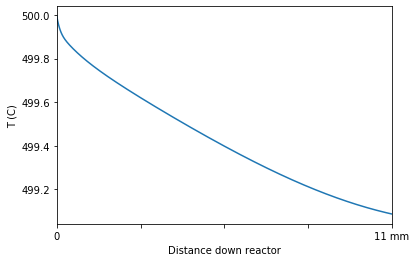

In [30]:
data['T (C)'].plot()
plt.ylabel('T (C)')
xlabels()

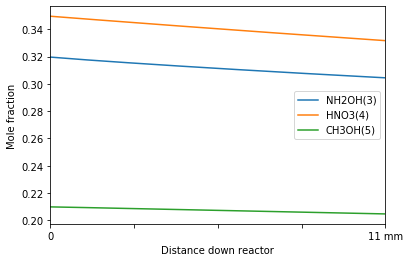

In [31]:
data[['NH2OH(3)', 'HNO3(4)', 'CH3OH(5)']].plot()
plt.ylabel('Mole fraction')
xlabels()

In [32]:
list(data.columns)[:4]

['Distance (mm)', 'T (C)', 'P (atm)', 'Ne']

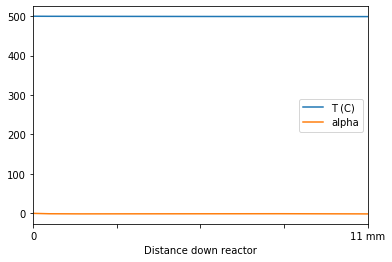

In [33]:
data[['T (C)', 'alpha']].plot()
xlabels()

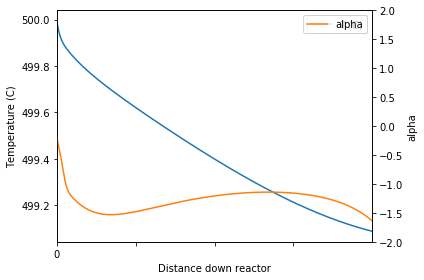

In [34]:
ax1 = data['T (C)'].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.legend()
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, color='tab:orange')
ax2.set_ylim(-2, 2)
plt.legend()
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('temperature-and-alpha.pdf')
plt.show()

In [35]:
data.columns

Index(['Distance (mm)', 'T (C)', 'P (atm)', 'Ne', 'NH3(2)', 'NH2OH(3)',
       'HNO3(4)', 'CH3OH(5)', 'H2O(6)', 'N2(7)', 'O2(8)', 'NO2(9)', 'NO(10)',
       'N2O(11)', 'CO2(12)', 'H2(13)', 'CO(14)', 'CH4(15)', 'C2H6(16)',
       'CH2O(17)', 'CH3(18)', 'C3H8(19)', 'H(20)', 'C2H5(21)', 'HCO(22)',
       'CH3CHO(23)', 'OH(24)', 'C2H4(25)', 'O(36)', 'Ar(37)', 'He(38)',
       'HO2(39)', 'H2O2(40)', 'HOCO(41)', 'CH2(42)', 'CH2(S)(43)', 'CH(44)',
       'CH2OH(45)', 'CH3O(46)', 'HCOH(47)', 'CH3OO(48)', 'CH2CO(49)',
       'C2H3(50)', 'C(51)', 'C2H2(52)', 'C2H(53)', 'CH3OOH(54)', 'CH2OOH(55)',
       'HOCH2O(56)', 'HOCHO(57)', 'C2H5O(58)', 'C2H5O2(59)', 'C2H5O2(60)',
       'cC2H4O(61)', 'CH2CHO(62)', 'H2CC(63)', 'CH3CO(64)', 'C2H4O(65)',
       'C2H5O(66)', 'C2H3O2(67)', 'CHCHO(68)', 'OCHCHO(69)', 'NH2(85)',
       'H2NO(88)', 'HNOH(93)', 'NO3(95)', 'H2NO3(239)', 'X(1)', 'HX(26)',
       'OX(27)', 'CH3X(28)', 'HOX(29)', 'H2OX(30)', 'CO2X(31)', 'OCX(32)',
       'CX(33)', 'CH2X(34)', 'CHX(35)

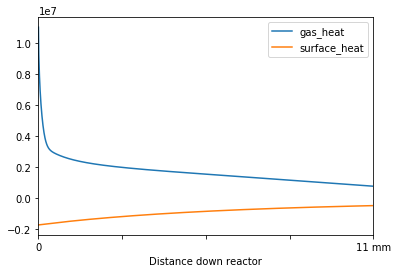

In [36]:
data[['gas_heat','surface_heat']].plot()
#plt.ylim(-1e7, 1e7)
xlabels()
plt.savefig('gas_and_surface_heat.pdf')
plt.show()


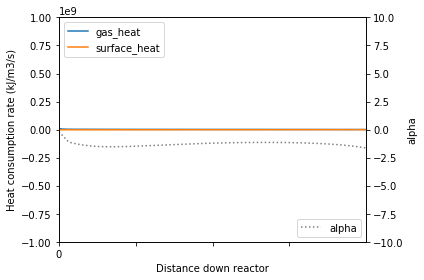

In [37]:
ax1 = data[['gas_heat','surface_heat']].plot()
plt.ylim(-1e9, 1e9)
xlabels()
plt.ylabel('Heat consumption rate (kJ/m3/s)')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, style='k:', alpha=0.5)
ax2.set_ylim(-10, 10)
plt.legend(loc='lower right')
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('heats-and-alpha.pdf')
plt.show()

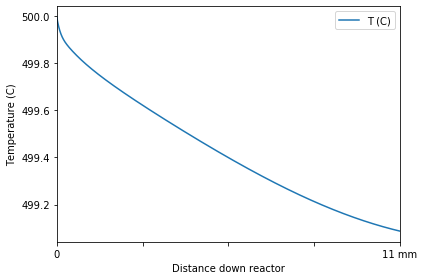

In [38]:
data[['T (C)']].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.tight_layout()
plt.savefig('temperature.pdf')
plt.show()

/Users/rwest/opt/anaconda3/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:652: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)


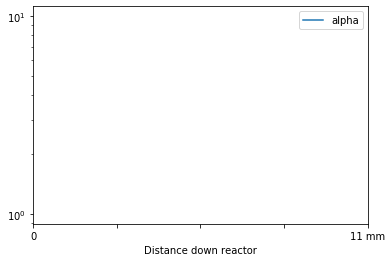

In [39]:
data[['alpha']].plot(logy=True)
xlabels()

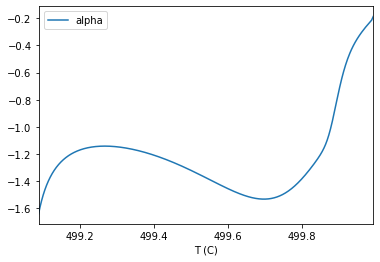

In [40]:
data.plot(x='T (C)',y='alpha')


In [41]:
specs = list(data.columns)
specs = specs[4:-1]

gas_species = [s for s in specs if 'X' not in s]
adsorbates = [s for s in specs if 'X' in s]

gas_species, adsorbates

(['NH3(2)',
  'NH2OH(3)',
  'HNO3(4)',
  'CH3OH(5)',
  'H2O(6)',
  'N2(7)',
  'O2(8)',
  'NO2(9)',
  'NO(10)',
  'N2O(11)',
  'CO2(12)',
  'H2(13)',
  'CO(14)',
  'CH4(15)',
  'C2H6(16)',
  'CH2O(17)',
  'CH3(18)',
  'C3H8(19)',
  'H(20)',
  'C2H5(21)',
  'HCO(22)',
  'CH3CHO(23)',
  'OH(24)',
  'C2H4(25)',
  'O(36)',
  'Ar(37)',
  'He(38)',
  'HO2(39)',
  'H2O2(40)',
  'HOCO(41)',
  'CH2(42)',
  'CH2(S)(43)',
  'CH(44)',
  'CH2OH(45)',
  'CH3O(46)',
  'HCOH(47)',
  'CH3OO(48)',
  'CH2CO(49)',
  'C2H3(50)',
  'C(51)',
  'C2H2(52)',
  'C2H(53)',
  'CH3OOH(54)',
  'CH2OOH(55)',
  'HOCH2O(56)',
  'HOCHO(57)',
  'C2H5O(58)',
  'C2H5O2(59)',
  'C2H5O2(60)',
  'cC2H4O(61)',
  'CH2CHO(62)',
  'H2CC(63)',
  'CH3CO(64)',
  'C2H4O(65)',
  'C2H5O(66)',
  'C2H3O2(67)',
  'CHCHO(68)',
  'OCHCHO(69)',
  'NH2(85)',
  'H2NO(88)',
  'HNOH(93)',
  'NO3(95)',
  'H2NO3(239)',
  'gas_heat',
  'surface_heat'],
 ['X(1)',
  'HX(26)',
  'OX(27)',
  'CH3X(28)',
  'HOX(29)',
  'H2OX(30)',
  'CO2X(31)',
  'OCX(32

/Users/rwest/opt/anaconda3/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


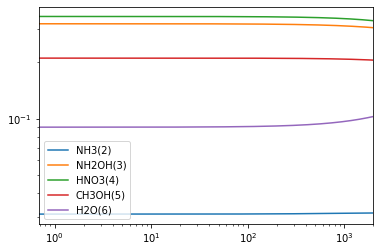

In [42]:
data[gas_species[0:5]].plot(logy=True, logx=True)

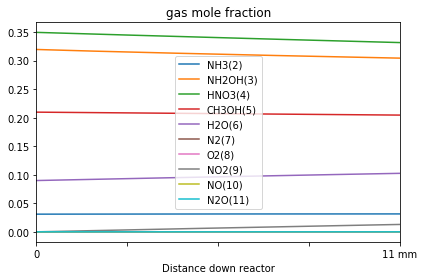

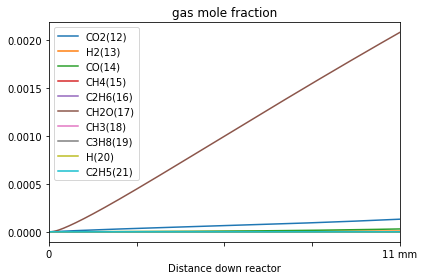

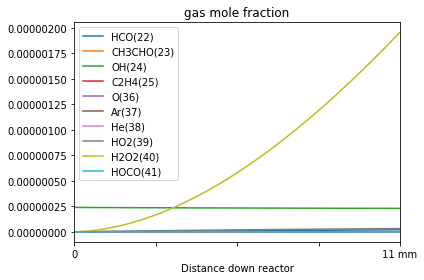

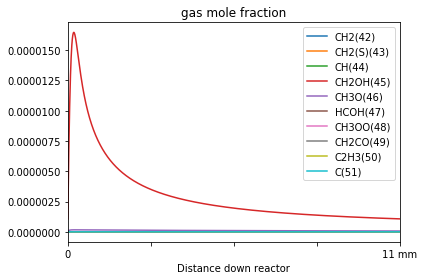

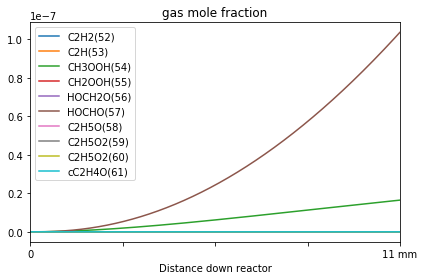

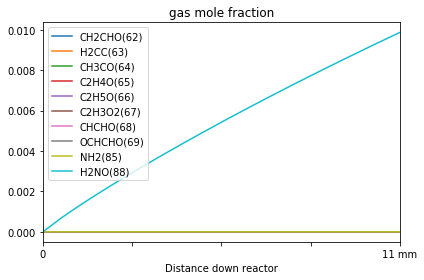

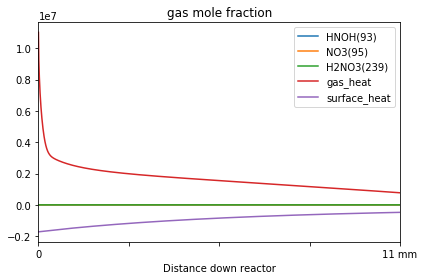

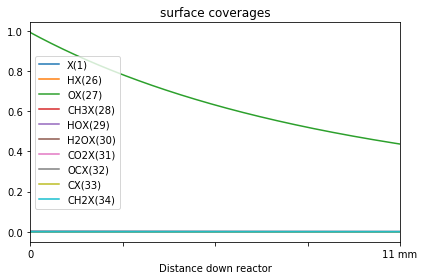

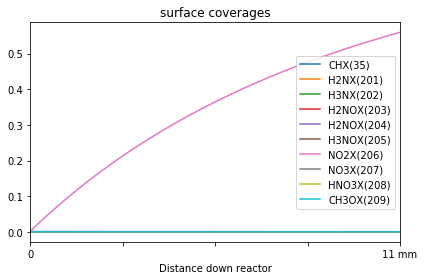

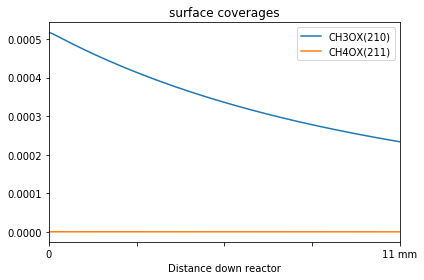

In [43]:
for i in range(0,len(gas_species),10):
    data[gas_species[i:i+10]].plot(title='gas mole fraction', logy=False)
    xlabels()
    plt.tight_layout()
    plt.savefig(f'gas_mole_fractions_{i}.pdf')
    plt.show()
    
for i in range(0,len(adsorbates),10):
    data[adsorbates[i:i+10]].plot(title='surface coverages', logy=False)
    xlabels()
    plt.tight_layout()
    plt.savefig(f'surface_coverages_{i}.pdf')
    plt.show()